# Application de l'algorithme EM à des modèles de mélange gaussiens en dimension d>1:
## Le modèle de mélange:

Le modèle de mélange de gaussiennes est largement utilisé pour la classification et la segmentation d'images, la reconnaissance de motifs, la compression de données, la modélisation des données ,en apprentissage automatique et en statistiques. L'algorithme **EM : Expectation-Maximization**  est l'un des algorithmes les plus couramment utilisés pour estimer les paramètres inconnus d'un modèle de mélange de gaussiennes.

Dans ce projet on veut implementer l'algorithme et evaluer son efficacité selon les differentes variables: les estimateurs initiales, le nombre d'observations, le nombre de dimensions, et le nombre de clustres dans la mixture. 

### La densité d'une gausienne en dimenssion d>1:
$$f(\mathbf{x}) = \frac{1}{2\pi \sqrt{\det(\boldsymbol{\Sigma})}} \exp\left(-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu}) \right)$$

où :
$\boldsymbol{\mu} $ est le vecteur de moyenne ,$\boldsymbol{\Sigma} $ est sa matrice de covariance.



### Densité de mélange de n gausiennes :
La densité d'un mélange de **M** gausiennes de dimenssion **d>1** est donnée par:
$$f_\theta(x)= \sum_{i=1}^{n}\pi_if_{\mathcal N(\mu_i,\boldsymbol{\Sigma}_i)}(x)$$

où :

$\hspace{1cm} *\hspace{0.3cm}f_{\mathcal N(\mu_i,\boldsymbol{\Sigma}_i)}$ représente la densité d'une loi normale de dimension d>1.

$\hspace{1cm} *\hspace{0.3cm}\boldsymbol{\theta} = ({\pi_1,..., \pi_M, \boldsymbol{\mu}_1,..., \boldsymbol{\mu}_M, \boldsymbol{\Sigma}_1,..., \boldsymbol{\Sigma}_M})$ représente les paramètres inconnus qu'on veut estime du modèle de mélange de M gaussiennes .

$\hspace{1cm}  *\hspace{0.3cm}\pi_1,...,\pi_M$:sont les poids des n gausiennes,le poids de ponderation dans le mélange.

$\hspace{1cm}  *\hspace{0.3cm} \boldsymbol{\mu}_1,...,\boldsymbol{\mu}_M $:sont les vecteurs des moyenne des M gaussiennes.

$\hspace{1cm}  *\hspace{0.3cm} \boldsymbol{\Sigma}_1,...,\boldsymbol{\Sigma}_M $:sont les matrices de covariance des M gaussiennes.



## Algorithme EM : Expectation-Maximization.

L'algorithme **EM**  est une méthode d'optimisation **itérative** qui est souvent utilisée pour **estimer les paramètres** d'un modèle probabiliste (dans notre cas modèles de mélange gaussiens en dimension d>1) lorsque certaines données sont manquantes ou latentes.



Les deux étapes à l'itération $k$ pour une mixture de M gaussiennes de l'algorithme EM sont :

**(E-step) :** Calcule de la probabilité qu'une donnée appartienne à une classe ou cluster donnée $j$ (Calcul des responsabilités):

$$w_{j}^{(k)}(y) = \frac{\hat{\pi}_{j}^{(k)}\hat{\varphi}_{j}^{(k)}(y)}{\sum_{l=1}^{M}\hat{\pi}_{l}^{(k)}\hat{\varphi}_{l}^{(k)}(y)}$$

où $\hat{\varphi}_{j}^{(k)}$ est la densité de la loi gaussienne de paramètres $\hat{\mu}_j^{(k)}$ et $\hat{\Sigma}_j^{(k)}$.

**(M-step) :** Estimation des nouveau paramétres des deux distributions:

$$\hat{\pi}_j^{(k+1)} = \frac{1}{n}\sum_{i=1}^{n} w_k^{(k)}(y_i)$$

$$\hat{\mu}_j^{(k+1)} = \sum_{i=1}^{n}\frac{w_j^{(k)}(y_i)}{\sum_{l=1}^{n}w_k^{(k)}(y_l)}y_i $$

$$ \Sigma_j^{(k+1)} = \sum_{i=1}^{n}\frac{w_{j}^{(k)}(y_i)}{\sum_{l=1}^{n}w_{j}^{(k)}(y_l)}(y_i-\hat{\mu}_{j}^{(k+1)})(y_i-\hat{\mu}_{j}^{(k+1)})^T$$

Les expressions pour les estimateurs des paramètres $\pi, \mu$ et $\Sigma$ du M-step sont obtenus en résolvant $\nabla(Q(\theta, \hat{\theta} ^{(k)}) = 0$, où $Q(\theta, \hat{\theta} ^{(k)})$ est la quantité intermédiaire:
$$ Q(\theta, \hat{\theta} ^{(k)}) = \sum_{i=1}^{n}\sum_{j=1}^{M} w_{j}^{(k)}(y_i)\Big( \log\pi_j - \frac{1}{2}\log(|2\pi\Sigma_j|) - \frac{1}{2}(y_i-\mu_j)^T\Sigma_j^{-1}(y_i-\mu_j)\Big)$$

### Exemple en 2 dimension avec un mélange de deux gaussiennes

Les deux étapes de L'algorithme EM en dimension 2 sont :

**(E-step) :** Calcule de la probabilité qu'une donnée appartienne à une classe ou cluster (ici 2 clusters) donnée (Calcul des responsabilités):

$$\gamma_{j}^{(k)}(y) = \frac{\hat{\pi}_{j}^{(k)}\hat{\varphi}_{j}^{(k)}(y)}{\hat{\pi}_{1}^{(k)}\hat{\varphi}_{1}^{(k)}(y) + \hat{\pi}_{2}^{(k)}\hat{\varphi}_{2}^{(k)}(y)}$$



**(M-step) :** Estimation des nouveau paramétres des deux distributions:


\begin{equation}
\hat{\mu_1}^{(k+1)} = \frac{\sum_{k=1}^2 (1-\hat{\gamma_i}) y_i}{\sum_{k=1}^2 (1-\hat{\gamma}_i)}
\end{equation}

\begin{equation}
\hat{\mu_2}^{(k+1)} = \frac{\sum_{k=1}^2 \hat{\gamma_i} y_i}{\sum_{k=1}^2 \hat{\gamma}_i}
\end{equation}

\begin{equation}
\hat{\Sigma_{k+1}} = \sum_{i=1}^n \hat{\gamma_i} (\mathbf{y}_{i} - \hat{\boldsymbol{\mu}}_{k+1})(\mathbf{y}{i} - \hat{\boldsymbol{\mu}}_{k+1})^T
\end{equation}

\begin{equation}
\hat{\pi}^{(k+1)} = \frac{1}{N} \sum_{i=1}^N \gamma_i
\end{equation}

**Fonction de calcule de la log_vraisemblance:**

\begin{equation}
\mathcal{L}(\theta ; Z) = \sum_{i=1}^N \log[(1 - \pi) \varphi_{\theta_1}(y_i) + \pi \varphi_{\theta_2}(y_i)]
\end{equation}









In [45]:
###########     packages     ###########

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from autograd import grad
rng = np.random.default_rng()
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns 
#sns.set_theme() 

In [25]:
###########     simuler des réalisations d'un mélange de gaussiennes bi-dimensionnel     ###########

    #definition des paramétres:
    
mu1_true = np.array([-1, -1])
mu2_true = np.array([2, 2])
cov1_true = np.array([[1, 0], [0, 1]])
cov2_true = np.array([[1, 0.5], [0.5, 1]])
w1_true=0.6
w2_true = 0.4
n_samples = 1000

    #simulation: 

X1 = np.random.multivariate_normal(mu1_true, cov1_true, int(n_samples * 0.6))
X2 = np.random.multivariate_normal(mu2_true, cov2_true, int(n_samples * 0.4))
X = np.concatenate((X1, X2))

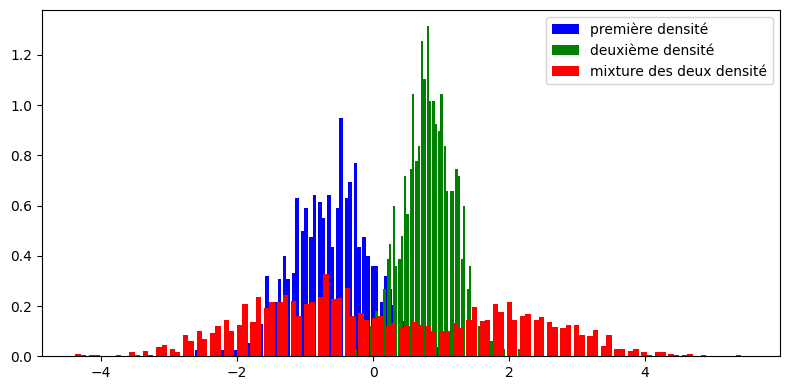

In [26]:
###########     Histogrames des réalisations et de la loi de mélange de deux gausiennes:    

fig, ax1= plt.subplots(nrows=1, ncols=1, figsize=(8, 4), layout='tight')
ax1.hist(w1_true*X1,density=True,bins=30,color=("blue","blue"),label="première densité")
ax1.hist(w2_true*X2,density=True,bins=30,color=("green","green"),label="deuxième densité")
ax1.hist(X,density=True,bins=50,color=("red","red"),label="mixture des deux densité")
ax1.legend()

### 1 / Initialisation des paramétres : 
Verification avec d'autre valeurs de l'initialisation des paramétre pour s'assurer que la convergence n'est pas vers un minimum local.

In [27]:
# Initialisation des paramètres
w1 = 0.3
w2 = 0.7
mu1 = [-1, -1]
mu2 = [3, 3]
cov1 = [[2, 0], [0, 2]]
cov2 = [[1, -0.5], [-0.5, 1]]

### 2 / code de l'implémentation de l'algorithme (*EM*)  pour l'estimation des paramétres :

In [28]:
# Définition de la fonction d'estimation des paramètres
def estimate_params(X, w1, w2, mu1, mu2, cov1, cov2):
    
    # Calcul des responsabilités des gaussiennes :
    r1 = w1 * multivariate_normal.pdf(X, mu1, cov1)
    r2 = w2 * multivariate_normal.pdf(X, mu2, cov2)
    r = r1 + r2
    r1 /= r
    r2 /= r
    
    # Estimation des poids des gaussiennes :
    new_w1 = np.mean(r1)
    new_w2 = np.mean(r2)
    
    # Estimation des moyennes des gaussiennes:
    new_mu1 = np.dot(r1, X) / np.sum(r1)
    new_mu2 = np.dot(r2, X) / np.sum(r2)
    
    # Estimation des matrices de covariance des gaussiennes:
    diff1 = X - mu1
    new_cov1 = np.dot(r1 * diff1.T, diff1) / np.sum(r1)
    diff2 = X - mu2
    new_cov2 = np.dot(r2 * diff2.T, diff2) / np.sum(r2)
    
    return new_w1, new_w2, new_mu1, new_mu2, new_cov1, new_cov2

### 2 : itération de l'algorithme jusqu'a convergence

In [29]:
# Itérations de l'algorithme EM


# nombre maximum d'itérations
max_iter=15
# critére d'arrêt qui represente la difference entre deux vraisemblance sucessif:
tol=0.1

LOG_V=[]
# Initialisation de prev_log_likelihood
prev_log_likelihood = -np.inf

for i in range(max_iter):
    # Estimation des paramètres
    w1, w2, mu1, mu2, cov1, cov2 = estimate_params(X, w1, w2, mu1, mu2, cov1, cov2)
    
    # Calcul de la log-vraisemblance
    log_likelihood = np.sum(np.log(w1 * multivariate_normal.pdf(X, mu1, cov1) + w2 * multivariate_normal.pdf(X, mu2, cov2)))
    LOG_V.append(log_likelihood)

    # Convergence
    if abs(log_likelihood - prev_log_likelihood) < tol:
        break
    prev_log_likelihood = log_likelihood
print("\nValeurs estimés à la derniere iteration :  ")
print("  log_liklihood :",log_likelihood)
print("  mu1 = ", mu1," * mu2 = ",mu2,"\n* cov1 = ",cov1,"* cov2 = ",cov2,"\n * w1 = ",w1," * w2 = ",w2 )

LOG_V = np.array(LOG_V)    




Valeurs estimés à la derniere iteration :  
  log_liklihood : -3372.1064485359057
  mu1 =  [-1.00104085 -1.03507472]  * mu2 =  [2.05066793 2.05772104] 
* cov1 =  [[1.11644832 0.05423223]
 [0.05423223 0.94851524]] * cov2 =  [[0.85619056 0.4218476 ]
 [0.4218476  0.92629091]] 
 * w1 =  0.6020163889626194  * w2 =  0.39798361103738056


Text(0.5, 0, "Nombre d'iterations")

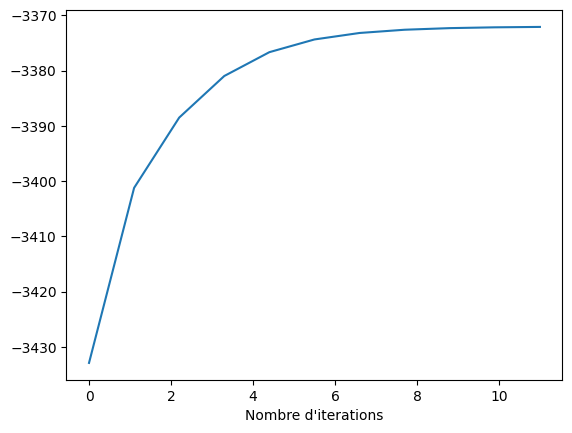

In [30]:
# Affichage de l'evolution de la logvraissemblance 
X=np.linspace(0,LOG_V.shape[0],LOG_V.shape[0])

plt.plot(X,LOG_V)
plt.xlabel("Nombre d'iterations")

On observe que l'algorithme converge très vite dans cet exemple, après environ 10 itérations avec une taille d'échantillon de 1000 et une tolerance de 0.1.


### Implementation de l'algorithme pour dimension d>1 en général

On definit maintenant les fonctions nécessaires pour une algorithme qui fonctionne pour tout nombre de gaussiens $M$ de dimension $d>1$ donnée. 

In [31]:
dens = multivariate_normal.pdf

def w(pi, mu, sigma, sample, M):
    """
    Input: Les estimateurs des paramètres pi, mu et sigma à l'itéraiton k, les samples et le nombre de clustres M
    Output: Le vecteur (w_1, ..., w_M) à l'itération k
    """
    n = sample.shape[0]
    w_result = np.zeros((M,n))
    for j in range(M):
        frac1 = pi[j]*dens(sample, mean=mu[j], cov=sigma[j])
        frac2 = 0
        for l in range(M):
            frac2 += pi[l]*dens(sample, mu[l], sigma[l]) 
        w_result[j] = frac1/frac2
    return w_result

def pi_next(w,sample, M):
    """
    Input: Le vecteur w à l'itération k, les samples et le nombre de clustres M
    Output: L'estimateur de pi à l'itération k+1
    """
    new_pi = np.zeros(M)
    for j in range(M):
        new_pi[j] = np.mean(w[j])
    return new_pi

def mu_next(w, sample, M):
    """
    Input: Le vecteur w à l'itération k, les samples et le nombre de clustres M
    Output: L'estimateur de mu à l'itération k+1
    """
    new_mu = np.zeros((M, d))
    n = sample.shape[0]
    for j in range(M):
        div = np.sum(w[j])
        res = np.dot(w[j], sample)
        new_mu[j] = res/div
    return new_mu

def sigma_next(w,mu,sigma, sample, M):
    """
    Input: Le vecteur w à l'itération k, les estimateurs de mu et sigma à l'itération k
            les samples et le nombre de clustres M
    Output: L'estimateur de sigma à l'itération k+1
    """
    sigma_new = np.zeros_like(sigma)
    n = sample.shape[0]
    for j in range(M):
        div = np.sum(w[j])
        res = 0
        for i in range(n):
            res += w[j][i]*np.outer((sample[i]-mu[j]),(sample[i]-mu[j]))
        sigma_new[j] = res/div
    return sigma_new

In [32]:
def EM(sample, theta, M, K = 100):
    """
    Inputs: Les samples, le vecteur des estimaturs initiales theta, le nombre de clustres M,
            le nombre d'itérations K
    Outputs: Les estimateurs des paramètres pi, mu et sigma après K itérations
    """
    pi_current = theta[0]
    mu_current = theta[1]
    sigma_current = theta[2]
    for i in range(K):
        w_current = w(pi_current, mu_current, sigma_current, sample, M)
        pi_new = pi_next(w_current, sample, M)
        mu_new = mu_next(w_current, sample, M)
        sigma_new = sigma_next(w_current, mu_current, sigma_current, sample, M)
        pi_current, mu_current, sigma_current = pi_new, mu_new, sigma_new
    return pi_current, mu_current, sigma_current

def EM_eps(sample, theta, M, K = 100, eps = 10e-1):
    """
    Inputs: Les samples, le vecteur des estimaturs initiales theta, le nombre de clustres M,
            le nombre maximal d'itérations K et le tolerance eps
    Outputs: Les estimateurs des paramètres pi, mu et sigma et le nombre d'itérations avant convergence
    """
    pi_current = theta[0]
    mu_current = theta[1]
    sigma_current = theta[2]
    diff = eps+1
    logv_current = multigauss_logpdf(sample, pi_current, mu_current, sigma_current)
    i = 0
    while diff > eps and i < K:
        pi_new, mu_new, sigma_new = EM(sample, [pi_current, mu_current, sigma_current],M, K=1)
        logv_new = multigauss_logpdf(sample, pi_new, mu_new, sigma_new)
        diff = np.abs(logv_new-logv_current)
        i += 1
        pi_current, mu_current, sigma_current, logv_current = pi_new, mu_new, sigma_new, logv_new
    return pi_current, mu_current, sigma_current, i

def EM_vect(sample, theta, M, K = 100):
    """
    Inputs: Les samples, le vecteur des estimaturs initiales theta, le nombre de clustres M,
            le nombre maximal d'itérations K
    Outputs: Les vecteurs des estimateurs des paramètres pi, mu et sigma à chaque itération 1,..., K
    """
    d = sample.shape[1]
    pi = np.zeros((K, M))
    mu = np.zeros((K, M, d))
    sigma = np.zeros((K, M, d, d))
    
    pi[0] = theta[0]
    mu[0] = theta[1]
    sigma[0] = theta[2]
    for i in range(K-1):
        w_current = w(pi[i], mu[i], sigma[i], sample, M)
        pi[i+1] = pi_next(w_current, sample, M)
        mu[i+1] = mu_next(w_current, sample, M)
        sigma[i+1] = sigma_next(w_current, mu[i], sigma[i], sample, M)
    return pi, mu, sigma

In [33]:
def multinormmix(n, mu, sigma, weights): #créer une mixte de multivariate normal v.a.
    """
    Inputs
    ----------
    n: number of samples
    mu: mean of each component
    sigma: std of each component
    weights: weights of the mixture
    
    Outputs
    -------
    samples: samples from the mixture model
    """
    
    d = mu.shape[1] #dimension des variables
    M = mu.shape[0] #nombre de classes
    x = np.random.multivariate_normal(np.zeros(d), np.eye(d), size=n) #initiate n v.a. multi-norm centrées réduites
    I = np.random.choice(M, n, p=weights) #choix de nombre de v.a. qui vont suivre chaque distribution selon les weights
    samples = np.zeros((n,d))
    for i in range(n):
        A = np.linalg.cholesky(sigma[I[i]])
        samples[i] = mu[I[i]] + np.matmul(A,x[i])
    return samples

In [34]:
def multigauss_logpdf(x, pi, mu, sigma):
    res = 0
    M = pi.shape[0]
    for j in range(M):
        res += pi[j]*multivariate_normal.pdf(x, mu[j], sigma[j])
    res = np.sum(np.log(res))
    return res


def plot_logvr(ax, sample, pi_vect, mu_vect, sigma_vect):
    K = pi_vect.shape[0] #nombre d'itérations
    log_vect = np.zeros(K) #initialisatin d'un array pour les valeurs de logvraisemblance
    for i in range(K):
        log_vect[i] = multigauss_logpdf(sample,pi_vect[i], mu_vect[i], sigma_vect[i])
    ax.plot(np.arange(0, K), log_vect);
    return log_vect

### Comparaison de la convergence de l'algorithme pour un mélange de trois gaussiens de dimension 2 avec different initialisations

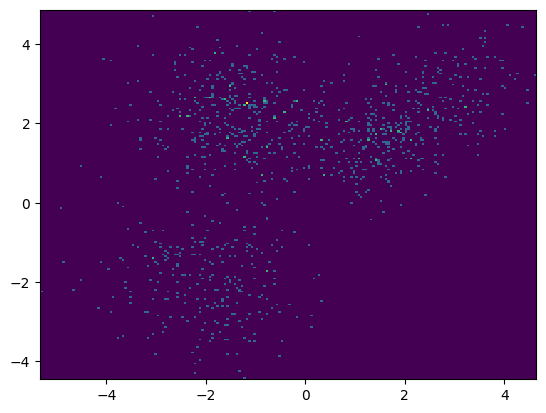

In [35]:
d = 2 #dimension
M = 3 #nombre de clustres
n = 1000 #taille de l'echantillon

#création des samples
mu1 = 2*np.ones(d)
cov1 = np.array([[1., 0.5],
                [0.5, 1.]])
mu2 = -mu1
cov2 = np.array([[1., -0.1],
                [-0.1, 1.]])
mu3 = np.array([-1.5, 2.2])
cov3 = 0.8 * np.eye(d)

mu = np.array([mu1, mu2, mu3])
sigma = np.array([cov1, cov2, cov3])
weights = np.array([0.4, 0.25, 0.35])

samples = multinormmix(n, mu, sigma, weights)

# plot des samples
plt.hist2d(samples[:,0], samples[:,1], bins=(200, 200))
plt.show()


#initialisation des paramètres de manière naïve
pi_0 = np.ones(3)/3
mu_0 = rng.uniform(size=(M,d))
sigma_0 = np.array([np.eye(d) for _ in range(M)])
theta = [pi_0, mu_0, sigma_0]

Si on n'avait pas créé ces samples, et on ne connaît pas les vrais paramètres, en étudiant ce plot on pourrait obtenir des paramètres initiales relativement proche aux vrais paramètres. Ici, on voit trois clustres distincts, parmi lesquels les deux premiers sont un peu plus presentes, donc on choisit $\pi_0 = (0.35, 0.35, 0.3)$. Ensuite leur moyennes semblent d'être environ $(-2, 2), (2, 2)$ et $(-2, -2)$, et le deuxième cluster semble d'avoir une covariance positive entre les deux coordonnées, donc on choisit l'estimateur de covariance initiale $\big(\begin{smallmatrix}
  1 & 0.5\\
  0.5 & 1
\end{smallmatrix}\big)$.

Nombre d'itérations nécessaires avec des paramètres initiales naïves:  12
Nombre d'itérations nécessaires avec des paramètres initiales plus proche aux vrais paramètres:  2


Text(0.5, 1.0, 'Paramètres initiales bien choisis')

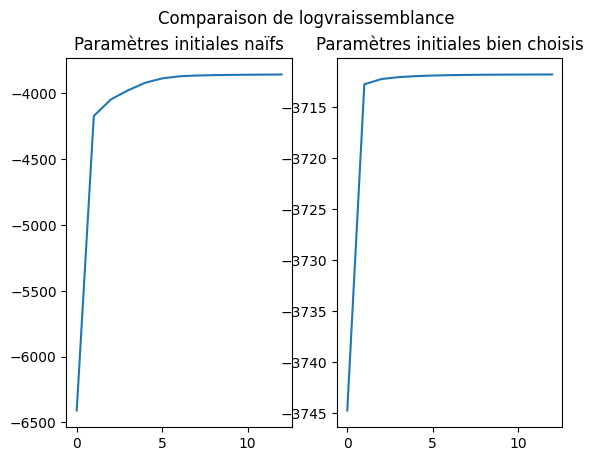

In [36]:
#initialisation des paramètres qui sont plus proches aux vrais paramètres
pi_proche = np.array([0.35, 0.35, 0.3])

mu1_proche = np.ones(d)
mu2_proche = -mu1
mu3_proche = np.array([-2, -2])
mu_proche = np.array([mu1, mu2, mu3])

cov1_proche = np.array([[1., 0.5],
                [0.5, 1.]])
cov2_proche = np.eye(d)
cov3_proche = np.eye(d)
sigma_proche = np.array([cov1, cov2, cov3])

theta_proche = [pi_proche, mu_proche, sigma_proche]

#On estime les paramètres avec les deuc initialisations differentes
pi_est, mu_est, sigma_est, K_final = EM_eps(samples, theta, M)
print("Nombre d'itérations nécessaires avec des paramètres initiales naïfs: ",K_final)

pi_est2, mu_est2, sigma_est2, K_final2 = EM_eps(samples, theta_proche, M)
print("Nombre d'itérations nécessaires avec des paramètres initiales plus proche aux vrais paramètres: ",K_final2)


# Calculer les estimateurs à chaque itération
pi_vect1, mu_vect1, sigma_vect1 = EM_vect(samples, theta, M, K_final+1)
pi_vect2, mu_vect2, sigma_vect2 = EM_vect(samples, theta_proche, M, K_final+1)

# Visualiser la logvraissemblance
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.suptitle("Comparaison de logvraissemblance")
plot_logvr(ax1, samples, pi_vect1, mu_vect1, sigma_vect1);
plot_logvr(ax2, samples, pi_vect2, mu_vect2, sigma_vect2);
ax1.set_title("Paramètres initiales naïfs")
ax2.set_title("Paramètres initiales bien choisis")

On voit qu'en général le nombre d'itérations nécessaires pour converger est plus petit pour les parametres initiales bien choisies que pour les paramètres initiales choisies de manière naïve.

### Exemple 2d avec plus de clustres

Nombre d'itérations nécessaires pour converger avec 10 clustres:  19


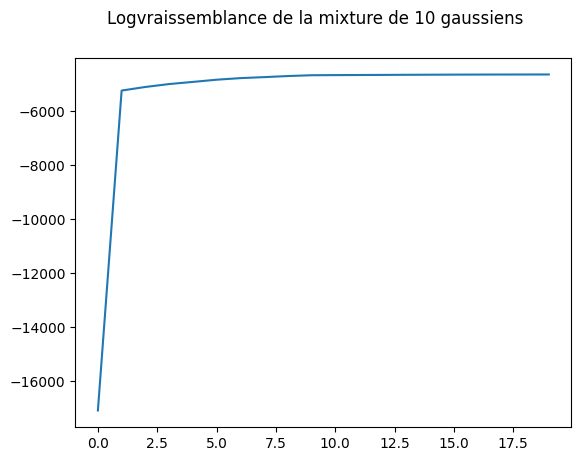

In [37]:
d = 2 #dimension
M = 6 #nombre de clusters

#création des samples
mu1 = 2*np.ones(d)
cov1 = np.array([[1., 0.5],
                [0.5, 1.]])
mu2 = -mu1
cov2 = np.array([[1., -0.1],
                [-0.1, 1.]])
mu3 = np.array([-1.5, 2.2])
cov3 = 0.8 * np.eye(d)

mu4 = -mu3
cov4 = np.array([[1., 0.2],
                [0.2, 1.]])

mu5 = np.array([1, -3])
cov5 = 0.5 * np.eye(d)

mu6 = -mu5
cov6 = np.array([[1., -0.2],
                [-0.2, 1.]])

mu7 = np.array([10, 4])
cov7 = np.array([[1., 0.7],
                [0.7, 1.]])

mu8 = np.array([4, -10])
cov8 = 1.2 * np.eye(d)

mu9 = -mu8
cov9 = np.array([[1., 0.3],
                [-0.2, 1.]])

mu10 = np.zeros(d)
cov10 = 0.2 * np.eye(d)


mu = np.array([mu1, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10])
sigma = np.array([cov1, cov2, cov3, cov4, cov5, cov6, cov7, cov8, cov9, cov10])
weights = np.array([0.15, 0.1, 0.2, 0.05, 0.075, 0.1, 0.075, 0.1, 0.05, 0.1])


n = 1000 #taille de l'échantillon
samples = multinormmix(n, mu, sigma, weights)

K = 100 #nombre maximale d'itérations

pi_0 = np.ones(M)/M
mu_0 = rng.uniform(size=(M,d))
sigma_0 = np.array([np.eye(d) for _ in range(M)])
pi, mu, sigma, K_est = EM_eps(samples, [pi_0, mu_0, sigma_0], M, K)
print("Nombre d'itérations nécessaires pour converger avec 10 clustres: ", K_est)


# Calculer les estimateurs à chaque itération
pi_vect, mu_vect, sigma_vect = EM_vect(samples, [pi_0, mu_0, sigma_0], M, K_est+1)

# Visualiser la logvraissemblance
fig, ax = plt.subplots()
fig.suptitle("Logvraissemblance de la mixture de 10 gaussiens")
plot_logvr(ax, samples, pi_vect, mu_vect, sigma_vect);

Dans cet exemple on voit qu'il faut plus d'itérations pour que l'algorithme converge dans le cas avec 10 gaussiens que dans le cas avec 2 ou 3 gaussiens avec la même tolerance. 

### Exemple en 3 dimensions

___________________________________________________
Exemple 3d avec la taille de l'échantillon n=  20
___________________________________________________
Les paramètres estimées:
pi_est: [0.24766945 0.75233055] 
 mu_est [[ 0.7302349   3.58752273  1.55390214]
 [-4.09543748  0.16125906 -0.93960134]] 
 sigma_est [[[13.00547542 10.70590553  1.87102427]
  [10.70590553  9.79815905  0.56910218]
  [ 1.87102427  0.56910218  1.35219115]]

 [[ 0.48056181  0.23690298 -0.04241405]
  [ 0.23690298  1.22215676 -0.09667008]
  [-0.04241405 -0.09667008  0.20840528]]]
Les vraies paramètres:
pi_true: [0.2 0.8] 
 mu_true:  [[ 3  5  2]
 [-4  0 -1]] 
 sigma_true:  [[[1.  0.5 0. ]
  [0.5 1.  0. ]
  [0.  0.  1. ]]

 [[1.  0.7 0. ]
  [0.3 1.  0. ]
  [0.  0.  1. ]]]
Nombre d'itérations:  6


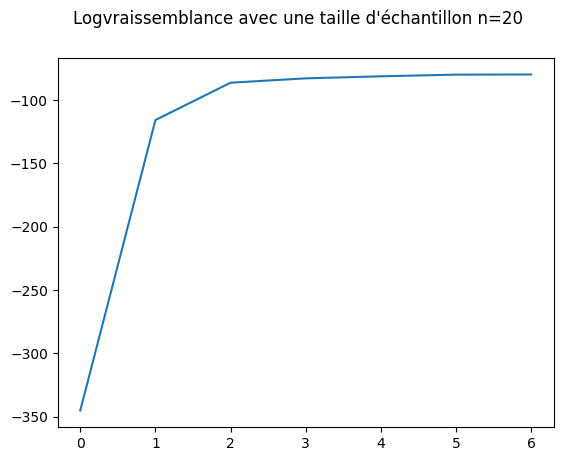

___________________________________________________
Exemple 3d avec la taille de l'échantillon n=  100
___________________________________________________
Les paramètres estimées:
pi_est: [0.79 0.21] 
 mu_est [[-4.00816951e+00 -5.01580107e-03 -1.04369579e+00]
 [ 2.85292559e+00  5.17604233e+00  2.22766929e+00]] 
 sigma_est [[[ 1.03231387  0.24474868  0.00260163]
  [ 0.24474868  0.92838396  0.04073642]
  [ 0.00260163  0.04073642  0.86351202]]

 [[ 1.02900435  0.48113523 -0.334609  ]
  [ 0.48113523  0.81505518 -0.25035988]
  [-0.334609   -0.25035988  0.918937  ]]]
Les vraies paramètres:
pi_true: [0.2 0.8] 
 mu_true:  [[ 3  5  2]
 [-4  0 -1]] 
 sigma_true:  [[[1.  0.5 0. ]
  [0.5 1.  0. ]
  [0.  0.  1. ]]

 [[1.  0.7 0. ]
  [0.3 1.  0. ]
  [0.  0.  1. ]]]
Nombre d'itérations:  6


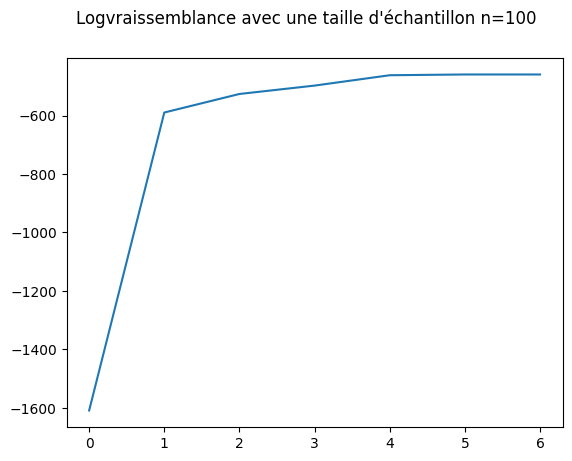

___________________________________________________
Exemple 3d avec la taille de l'échantillon n=  1000
___________________________________________________
Les paramètres estimées:
pi_est: [0.80351333 0.19648667] 
 mu_est [[-4.08682917e+00 -2.07492059e-03 -1.05682450e+00]
 [ 2.99739092e+00  5.00452123e+00  2.12949099e+00]] 
 sigma_est [[[ 1.12763799  0.37512789 -0.107677  ]
  [ 0.37512789  1.07219941 -0.04170385]
  [-0.107677   -0.04170385  0.94228637]]

 [[ 1.08001513  0.45850856 -0.02858423]
  [ 0.45850856  0.91189825  0.0229162 ]
  [-0.02858423  0.0229162   1.09411891]]]
Les vraies paramètres:
pi_true: [0.2 0.8] 
 mu_true:  [[ 3  5  2]
 [-4  0 -1]] 
 sigma_true:  [[[1.  0.5 0. ]
  [0.5 1.  0. ]
  [0.  0.  1. ]]

 [[1.  0.7 0. ]
  [0.3 1.  0. ]
  [0.  0.  1. ]]]
Nombre d'itérations:  10


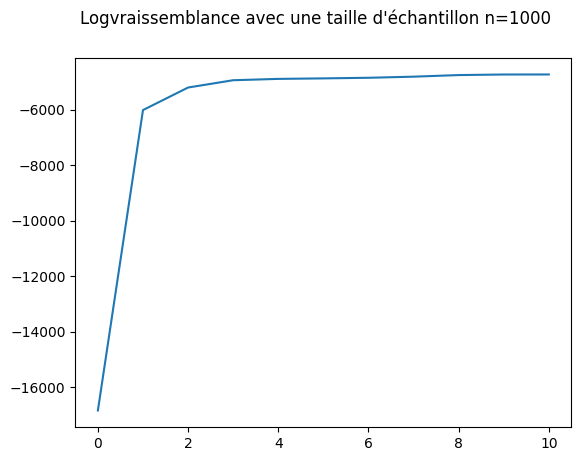

___________________________________________________
Exemple 3d avec la taille de l'échantillon n=  100000
___________________________________________________
Les paramètres estimées:
pi_est: [0.19961818 0.80038182] 
 mu_est [[ 2.99785370e+00  4.99789488e+00  2.00194044e+00]
 [-3.99624602e+00 -1.22996526e-03 -1.00088641e+00]] 
 sigma_est [[[ 1.00942757  0.50677136  0.00227552]
  [ 0.50677136  1.00985429 -0.00185888]
  [ 0.00227552 -0.00185888  0.99449844]]

 [[ 0.99945253  0.30285789 -0.00263594]
  [ 0.30285789  0.99716464 -0.00376804]
  [-0.00263594 -0.00376804  0.99901648]]]
Les vraies paramètres:
pi_true: [0.2 0.8] 
 mu_true:  [[ 3  5  2]
 [-4  0 -1]] 
 sigma_true:  [[[1.  0.5 0. ]
  [0.5 1.  0. ]
  [0.  0.  1. ]]

 [[1.  0.7 0. ]
  [0.3 1.  0. ]
  [0.  0.  1. ]]]
Nombre d'itérations:  12


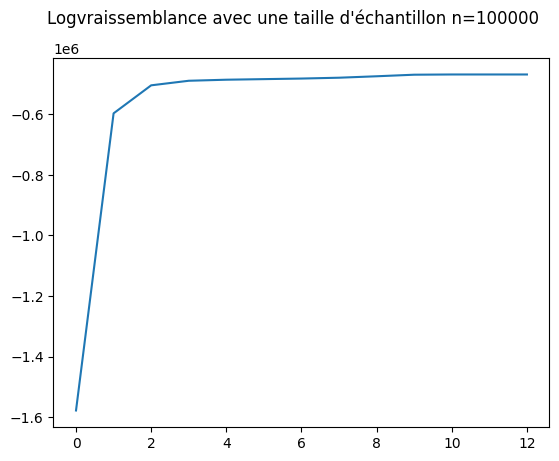

In [44]:
#definir les vrais paramètres
mu_true = np.array([[3,5,2], [-4, 0, -1]])
pi_true = np.array([0.2,0.8])
sigma_true = np.array([[[1,0.5, 0], [0.5, 1, 0], [0,0,1]],[[1,0.7, 0], [0.3, 1, 0], [0,0,1]]])

d = 3 #dimension
M = 2 #nombre de gaussiens
K = 40 #nombre d'itérations maximal
    
def exemple3d(n):
    #créer les samples
    samples3d = multinormmix(n, mu_true, sigma_true, pi_true);
    
    #initialiser les estimateurs
    mu_0 = rng.uniform(size=(M, d))
    pi_0 = np.ones(M)/M
    sigma_0 = np.array([np.eye(d) for _ in range(M)])
    theta_0 = [pi_0, mu_0, sigma_0]
    pi_est, mu_est, sigma_est, K_3d = EM_eps(samples3d, theta_0, M, K, eps=10e-1)
    print("Les paramètres estimées:")
    print("pi_est:" ,pi_est,"\n", "mu_est", mu_est,"\n", "sigma_est", sigma_est)
    print("Les vraies paramètres:")
    print("pi_true:", pi_true,"\n", "mu_true: ", mu_true,"\n", "sigma_true: ", sigma_true)
    print("Nombre d'itérations: " ,K_3d)

    fig, ax = plt.subplots()
    pi_vect, mu_vect, sigma_vect = EM_vect(samples3d, theta_0, M, K=K_3d+1);
    fig.suptitle(fr"Logvraissemblance avec une taille d'échantillon n={n}")
    plot_logvr(ax, samples3d, pi_vect, mu_vect, sigma_vect);
    plt.show()
    return


ns = np.array([20, 100, 1000, 100000])
for n in ns:
    print("___________________________________________________")
    print("Exemple 3d avec la taille de l'échantillon n=", n)
    print("___________________________________________________")
    exemple3d(n)

On remarque dans cet exemple que le nombre d'itérations nécessaire pour converger augmente un peu quand la taille de l'échantillon augmente, mais que cette augmentation est très faible par rapport à l'augmentation de la taille.


On observe aussi dans cet exemple que la convergence pour un mélange de deux gaussiens de dimension 3 est un peu plus rapide que la convergence d'un mélange de gaussiens de dimension 2 pour la même tolerance et même taille d'échantillon.

Pour conlcure, parmi tous les facteurs impactant l'efficacité de l'algorithme étudié dans ces exemples, comme le nombre de samples, la dimension des gaussiennes, le nombre de clusters dans la mixture et le choix des estimateurs initiales, c'est ce dernier qui semble d'avoir l'impact le plus grand. Donc l'execution répétée de l'algorithme avec des differentes paramètres initiales est essentielle pour être sur que l'algorithme converge vers un maximum globale et que le rate de convergence obtenue est representative. 